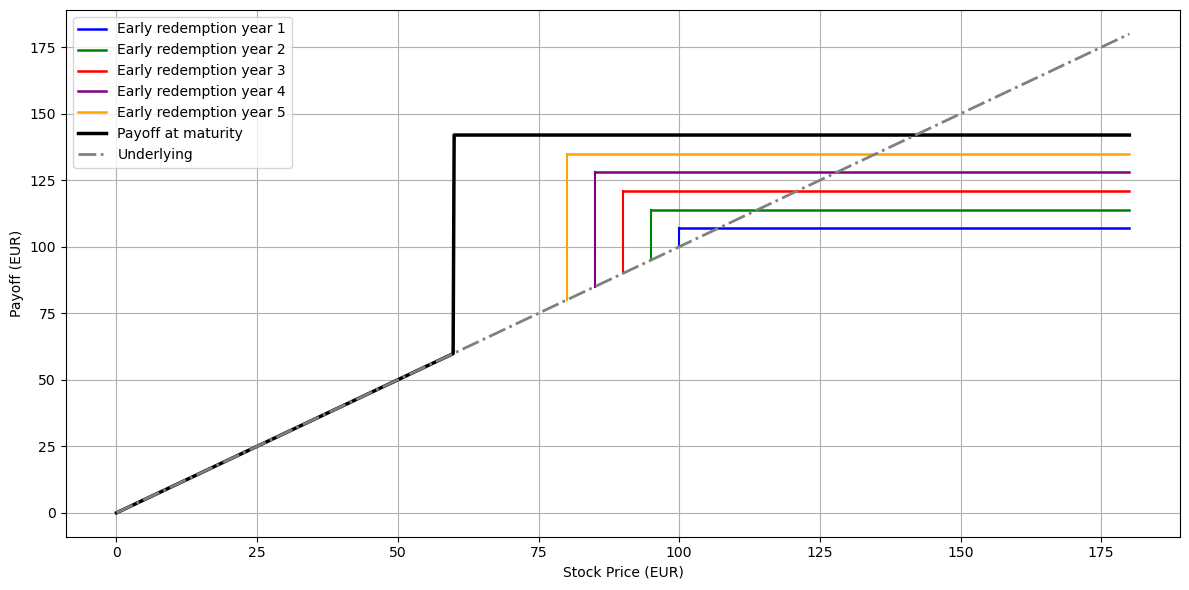

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
initial = 100
coupon_per_year = 7
n_years = 5
barrier = 0.6 * initial
redemption_levels = [1.0, 0.95, 0.9, 0.85, 0.8]
coupons = [coupon_per_year * (i + 1) for i in range(n_years)]
labels = [f'Early redemption year {i+1}' for i in range(n_years)]

# Define a color scheme
colors = ['blue', 'green', 'red', 'purple', 'orange']

# Price range
S = np.linspace(0.01, 180, 1000)

# Create the plot
fig, ax = plt.subplots(figsize=(12, 6))

# Plot early redemption payoffs
for i, level in enumerate(redemption_levels):
    redeem_level = level * initial
    payoff_val = 100 + coupons[i]
    
    # Vertical jump at redemption level
    ax.plot([redeem_level, redeem_level], [redeem_level, payoff_val], linestyle='-', color=colors[i], linewidth=1.5)
    
    # Flat payoff after redemption level
    S_right = S[S >= redeem_level]
    ax.plot(S_right, [payoff_val] * len(S_right), linestyle='-', color=colors[i], linewidth=1.8, label=labels[i])

# Maturity payoff
maturity_coupon = coupon_per_year * n_years + 7
maturity_payoff = np.where(S >= barrier, 100 + maturity_coupon, 100 * (S / initial))
ax.plot(S, maturity_payoff, color='black', linestyle='-', linewidth=2.5, label='Payoff at maturity')

# Underlying payoff
ax.plot(S, S, color='gray', linestyle='dashdot', linewidth=2, label='Underlying')

# Labels and formatting
ax.set_xlabel('Stock Price (EUR)')
ax.set_ylabel('Payoff (EUR)')
ax.grid(True)
ax.legend(loc='upper left')
fig.tight_layout()

